In [1]:
# Importing libraries
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
hotel_reviews = pd.read_csv('tourist_accommodation_reviews.csv', encoding='cp1252')
print(hotel_reviews.shape)
hotel_reviews.head()

(53644, 5)


,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [3]:
hotel_reviews.tail()

,ID,Review Date,Location,Hotel/Restaurant name,Review
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."
53643,rn161212765,"Reviewed May 19, 2013",Patong,Bite in,The restaurant put in a good location in Jungc...


In [4]:
hotel_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [5]:
# Top 10 review dates
hotel_reviews['Review Date'].value_counts()[:10].sort_values(ascending=False)

Reviewed 1 week ago            616
Reviewed 2 weeks ago           599
Reviewed 4 weeks ago           570
Reviewed 3 weeks ago           504
Reviewed April 3, 2018         153
Reviewed January 22, 2018      145
Reviewed January 2, 2018       145
Reviewed December 28, 2017     144
Reviewed December 29, 2017     130
Reviewed March 3, 2018         130
Name: Review Date, dtype: int64

<AxesSubplot:>

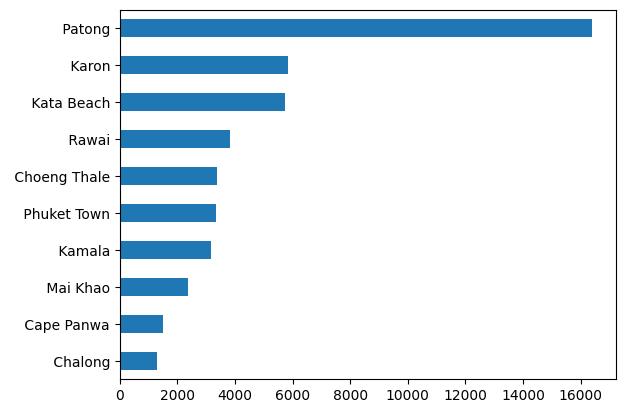

In [6]:
# Top 10 review locations
hotel_reviews['Location'].value_counts()[:10].sort_values().plot(kind='barh')

In [7]:
# Filtering the reviews for 'Patong' location
patong_hotel_reviews = hotel_reviews[hotel_reviews['Location'] == ' Patong']
patong_hotel_reviews = patong_hotel_reviews.drop_duplicates()
patong_hotel_reviews = patong_hotel_reviews.reset_index(drop=True)
print(patong_hotel_reviews.shape)
patong_hotel_reviews.head()

(15112, 5)


,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...
1,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...
2,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th..."
3,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,We made a reservation at the last minute to di...
4,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,We had a very great time to celebrate my son b...


In [8]:
patong_hotel_reviews.tail()

,ID,Review Date,Location,Hotel/Restaurant name,Review
15107,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
15108,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
15109,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
15110,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."
15111,rn161212765,"Reviewed May 19, 2013",Patong,Bite in,The restaurant put in a good location in Jungc...


In [9]:
patong_hotel_reviews['Review'][:5]

0    its very expensive in comparison to other loca...
1    We walked passed the holiday inn and decided a...
2    An atmosphere of the 70's, great comfort of th...
3    We made a reservation at the last minute to di...
4    We had a very great time to celebrate my son b...
Name: Review, dtype: object

In [10]:
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

# Apply lambda function to get compound scores.
function = lambda title: vader.polarity_scores(title)['compound']
patong_hotel_reviews['compound'] = patong_hotel_reviews['Review'].apply(function)
patong_hotel_reviews.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vinod.karyagol\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,ID,Review Date,Location,Hotel/Restaurant name,Review,compound
0,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...,0.8674
1,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...,0.4939
2,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th...",0.9839
3,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,We made a reservation at the last minute to di...,0.9626
4,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,We had a very great time to celebrate my son b...,0.9258


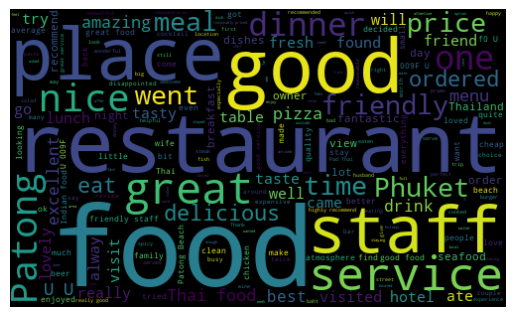

In [11]:
allWords = ' '.join([twts for twts in patong_hotel_reviews['Review']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

patong_hotel_reviews['sentiment'] = patong_hotel_reviews['compound'].apply(getAnalysis)

patong_hotel_reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,sentiment
0,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...,0.8674,Positive
1,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...,0.4939,Positive
2,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th...",0.9839,Positive
3,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,We made a reservation at the last minute to di...,0.9626,Positive
4,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,We had a very great time to celebrate my son b...,0.9258,Positive


In [13]:
patong_hotel_reviews['sentiment'].value_counts()

Positive    13381
Negative     1396
Neutral       335
Name: sentiment, dtype: int64

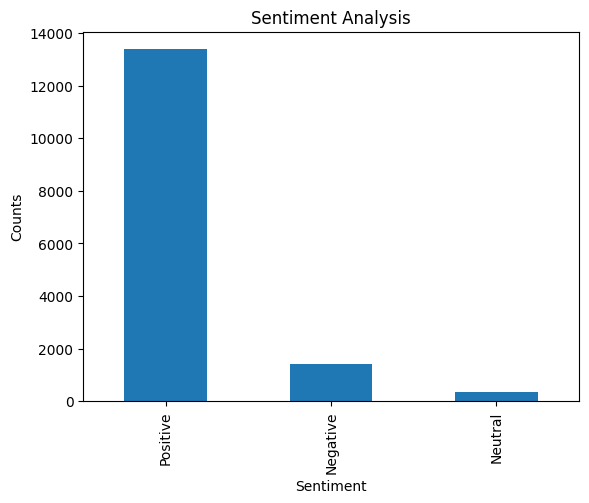

In [14]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
patong_hotel_reviews['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

Text(0, 0.5, 'Hotel Reviews Sentiment')

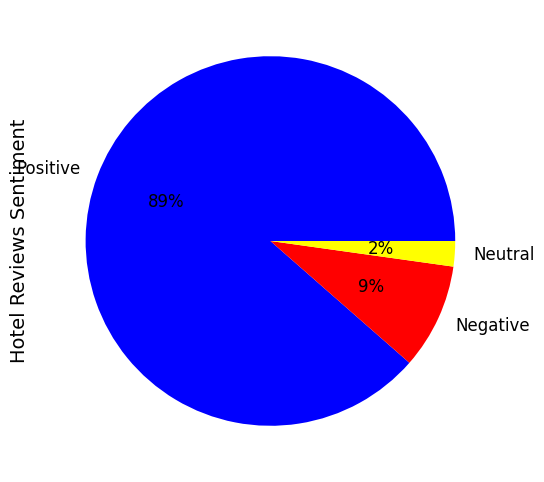

In [15]:
patong_hotel_reviews.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, figsize=(9,6), colors=["blue", "red", "yellow"])
plt.ylabel("Hotel Reviews Sentiment", size=14)

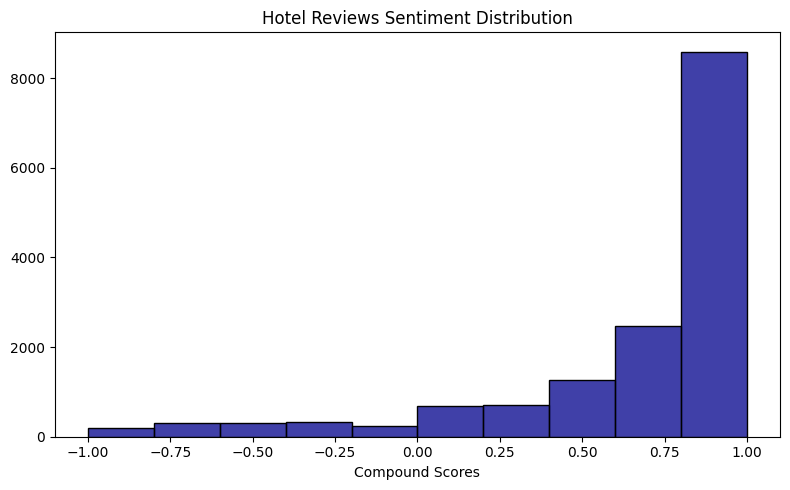

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(patong_hotel_reviews, x='compound', color="darkblue", bins=10, binrange=(-1, 1))
plt.title("Hotel Reviews Sentiment Distribution")
plt.xlabel("Compound Scores")
plt.ylabel("")
plt.tight_layout()